Class Distribution:
 Bankrupt?
0    96.77372
1     3.22628
Name: proportion, dtype: float64

Selected Features for Model: ['Debt ratio %', 'Current Liability to Assets', 'Borrowing dependency', 'Current Liability to Current Assets', 'Liability to Equity', 'Current Liabilities/Equity', 'Current Liability to Equity', 'Liability-Assets Flag', 'Total expense/Assets', 'ROA(C) before interest and depreciation before interest', 'ROA(B) before interest and depreciation after tax', 'ROA(A) before interest and % after tax', 'Net Income to Total Assets', 'Net Income Flag']


/Users/aryanthodupunuri/anaconda3/lib/python3.11/site-packages/xgboost/core.py:158: UserWarning: [14:09:49] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)



📊 Model Performance Comparison:
                  Model  ROC-AUC Score
0  Logistic Regression       0.905010
1        Random Forest       0.880045
2              XGBoost       0.918337
3                  SVM       0.887190

--- Logistic Regression Report ---
              precision    recall  f1-score   support

           0       0.99      0.87      0.93      1320
           1       0.17      0.82      0.28        44

    accuracy                           0.87      1364
   macro avg       0.58      0.84      0.60      1364
weighted avg       0.97      0.87      0.90      1364


--- Random Forest Report ---
              precision    recall  f1-score   support

           0       0.97      0.99      0.98      1320
           1       0.56      0.20      0.30        44

    accuracy                           0.97      1364
   macro avg       0.77      0.60      0.64      1364
weighted avg       0.96      0.97      0.96      1364


--- XGBoost Report ---
              precision    recal

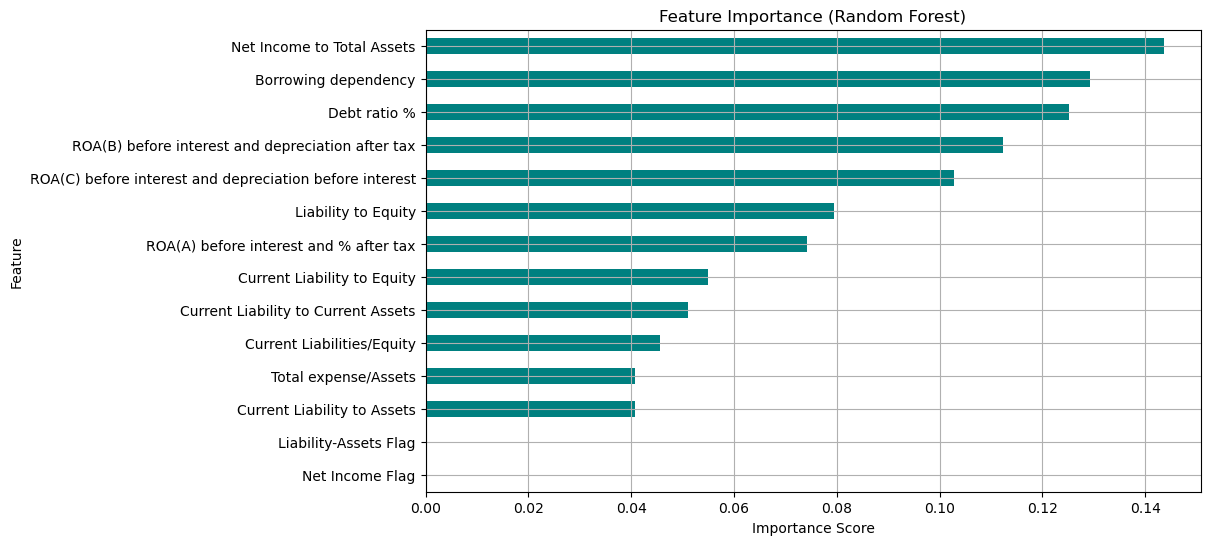

In [58]:
# 📦 Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.svm import SVC
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score

# --- 📊 Step 1: Load & Explore Data (EDA) ---

# Load dataset
df = pd.read_csv("data.csv")  # Ensure correct file path

# Clean column names (remove spaces)
df.columns = df.columns.str.strip()

# Check class distribution
print("Class Distribution:\n", df["Bankrupt?"].value_counts(normalize=True) * 100)

# Compute correlation with target variable (Bankruptcy)
correlation_with_target = df.corr()["Bankrupt?"].sort_values(ascending=False)

# Select top correlated features (top 10 positive & top 5 negative)
selected_features = list(correlation_with_target.head(10).index) + list(correlation_with_target.tail(5).index)
selected_features.remove("Bankrupt?")  # Remove target variable from features

# Print selected features
print("\nSelected Features for Model:", selected_features)

# --- 📂 Step 2: Data Preprocessing ---

# Define Features (X) and Target (y)
X = df[selected_features]
y = df["Bankrupt?"]

# Standardize Features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# --- 📉 Step 3: Train-Test Split ---

X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42, stratify=y)

# --- 🤖 Step 4: Train Logistic Regression Model ---

log_reg = LogisticRegression(class_weight="balanced", max_iter=1000, random_state=42)
log_reg.fit(X_train, y_train)
y_pred_log = log_reg.predict(X_test)
y_prob_log = log_reg.predict_proba(X_test)[:, 1]
roc_auc_log = roc_auc_score(y_test, y_prob_log)

# --- 🌲 Step 5: Train Random Forest Model ---

rf_model = RandomForestClassifier(n_estimators=100, class_weight="balanced", random_state=42)
rf_model.fit(X_train, y_train)
y_pred_rf = rf_model.predict(X_test)
y_prob_rf = rf_model.predict_proba(X_test)[:, 1]
roc_auc_rf = roc_auc_score(y_test, y_prob_rf)

# --- ⚡ Step 6: Train XGBoost Model ---

xgb_model = XGBClassifier(use_label_encoder=False, eval_metric="logloss", random_state=42)
xgb_model.fit(X_train, y_train)
y_pred_xgb = xgb_model.predict(X_test)
y_prob_xgb = xgb_model.predict_proba(X_test)[:, 1]
roc_auc_xgb = roc_auc_score(y_test, y_prob_xgb)

# --- 🔵 Step 7: Train SVM Model ---
svm_model = SVC(kernel="linear", probability=True, class_weight="balanced", random_state=42)
svm_model.fit(X_train, y_train)
y_pred_svm = svm_model.predict(X_test)
y_prob_svm = svm_model.predict_proba(X_test)[:, 1]
roc_auc_svm = roc_auc_score(y_test, y_prob_svm)

# --- 📊 Step 8: Compare Model Performance ---

model_results = pd.DataFrame({
    "Model": ["Logistic Regression", "Random Forest", "XGBoost", "SVM"],
    "ROC-AUC Score": [roc_auc_log, roc_auc_rf, roc_auc_xgb, roc_auc_svm]
})

# Display Model Comparison
print("\n📊 Model Performance Comparison:\n", model_results)

# --- 📊 Step 9: Print Classification Reports ---

print("\n--- Logistic Regression Report ---")
print(classification_report(y_test, y_pred_log))

print("\n--- Random Forest Report ---")
print(classification_report(y_test, y_pred_rf))

print("\n--- XGBoost Report ---")
print(classification_report(y_test, y_pred_xgb))

print("\n--- SVM Report ---")
print(classification_report(y_test, y_pred_svm))

# --- 📊 Step 10: Visualize Feature Importance (Random Forest) ---

feature_importance = pd.Series(rf_model.feature_importances_, index=selected_features).sort_values()

plt.figure(figsize=(10, 6))
feature_importance.plot(kind="barh", color="teal")
plt.title("Feature Importance (Random Forest)")
plt.xlabel("Importance Score")
plt.ylabel("Feature")
plt.grid()
plt.show()
